# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
!pip install citipy

In [47]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from requests.exceptions import ConnectionError
from pprint import pprint
import sys
import scipy.stats as st
from scipy import stats

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

603

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?id=524901"
unit = "metric"
query_url = f"{url}&appid={weather_api_key}&units={unit}&q="

# Lists for results
lat = []
lon = []
foundCities = []
temp = []
humidity = []
cloudiness = []
windSpeed = []
date = []
country = []

for city in cities:
    try:
        response = requests.get(query_url + city).json()
        lat.append(response["coord"]["lat"])
        lon.append(response["coord"]["lon"])
        temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        windSpeed.append(response["wind"]["speed"])
        date.append(response["dt"])
        country.append(response["sys"]["country"])
        foundCities.append(city)
        print(f"City processed: {city}")
    except:
        print(f"City NOT found: {city}")


City processed: victoria
City processed: mar del plata
City processed: upernavik
City NOT found: tlahuapan
City processed: liyang
City processed: nikolskoye
City processed: hilo
City processed: kaitangata
City processed: puerto ayora
City processed: punta arenas
City processed: canals
City processed: jamestown
City processed: arraial do cabo
City processed: mataura
City processed: portland
City processed: tautira
City processed: honningsvag
City processed: georgetown
City processed: butaritari
City processed: mahebourg
City processed: terrasini
City NOT found: mys shmidta
City processed: yellowknife
City processed: tiarei
City processed: ushuaia
City processed: busselton
City processed: chokurdakh
City processed: bikin
City processed: mazamari
City processed: obihiro
City processed: sao joao da barra
City processed: wagar
City processed: saint george
City processed: bethel
City processed: atuona
City processed: auriflama
City processed: vestmanna
City processed: hasaki
City processed: 

City NOT found: longlac
City processed: havre-saint-pierre
City processed: bosaso
City processed: beringovskiy
City NOT found: buariki
City processed: inuvik
City processed: padang
City processed: saskylakh
City processed: takoradi
City processed: antofagasta
City NOT found: tsihombe
City processed: ambagarh chauki
City processed: komsomolskiy
City processed: alyangula
City processed: diamantino
City processed: pangnirtung
City processed: viedma
City processed: thinadhoo
City processed: bac lieu
City processed: mapiripan
City processed: denpasar
City processed: minas
City processed: barra
City processed: half moon bay
City processed: lazaro cardenas
City processed: kruisfontein
City processed: sungaipenuh
City processed: nanning
City processed: erzin
City processed: kodiak
City processed: turtas
City processed: chirongui
City processed: sao sebastiao
City processed: vinderei
City processed: dubti
City processed: green river
City processed: balkanabat
City processed: bubaque
City proces

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
weather_dict = {
     'City': foundCities,
     'Cloudiness':cloudiness,
     'Country':country,
     'Date':date,
     'Humidity':humidity,
     'Lat':lat,
     'Lng':lon,
     'temp':temp,
     'Wind Speed':windSpeed,
     }

weather_data = pd.DataFrame(weather_dict)
weather_data

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,temp,Wind Speed
0,victoria,100,HK,1639988494,88,22.2855,114.1577,17.40,0.45
1,mar del plata,0,AR,1639988679,96,-38.0023,-57.5575,17.71,3.13
2,upernavik,100,GL,1639988680,70,72.7868,-56.1549,-3.88,1.95
3,liyang,58,CN,1639988681,36,29.7057,118.2862,16.17,1.54
4,nikolskoye,100,RU,1639988682,85,59.7035,30.7861,-9.06,4.57
...,...,...,...,...,...,...,...,...,...
547,canatlan,0,MX,1639989130,82,24.5167,-104.7833,6.29,1.52
548,southbridge,0,US,1639989131,76,42.0751,-72.0334,-6.19,0.89
549,la rioja,83,ES,1639988925,57,42.2500,-2.5000,-3.12,2.41
550,kadnikov,100,RU,1639989132,91,59.5022,40.3380,-15.03,4.85


In [10]:
weather_data.to_csv("Cities.csv", index = False)
weather_data

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,temp,Wind Speed
0,victoria,100,HK,1639988494,88,22.2855,114.1577,17.40,0.45
1,mar del plata,0,AR,1639988679,96,-38.0023,-57.5575,17.71,3.13
2,upernavik,100,GL,1639988680,70,72.7868,-56.1549,-3.88,1.95
3,liyang,58,CN,1639988681,36,29.7057,118.2862,16.17,1.54
4,nikolskoye,100,RU,1639988682,85,59.7035,30.7861,-9.06,4.57
...,...,...,...,...,...,...,...,...,...
547,canatlan,0,MX,1639989130,82,24.5167,-104.7833,6.29,1.52
548,southbridge,0,US,1639989131,76,42.0751,-72.0334,-6.19,0.89
549,la rioja,83,ES,1639988925,57,42.2500,-2.5000,-3.12,2.41
550,kadnikov,100,RU,1639989132,91,59.5022,40.3380,-15.03,4.85


In [27]:
weather_data.describe()

,Cloudiness,Date,Humidity,Lat,Lng,temp,Wind Speed
count,552.000000,5.520000e+02,552.000000,552.000000,552.000000,552.000000,552.000000
mean,59.050725,1.639989e+09,72.882246,19.532274,13.546494,10.636395,3.552156
std,40.165280,1.432679e+02,20.995780,33.908877,90.604217,17.137088,2.664705
min,0.000000,1.639988e+09,6.000000,-54.800000,-179.166700,-45.240000,0.000000
25%,15.000000,1.639989e+09,62.000000,-9.843675,-65.730675,0.530000,1.540000
50%,75.000000,1.639989e+09,77.000000,24.602200,16.011700,15.880000,2.855000
75%,99.000000,1.639989e+09,89.000000,46.666475,88.086775,24.200000,4.835000
max,100.000000,1.639989e+09,100.000000,78.218600,179.316700,36.910000,15.240000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [28]:
Humiditydata_df = weather_data["Humidity"]
Humiditydata_df

0      88
1      96
2      70
3      36
4      85
       ..
547    82
548    76
549    57
550    91
551    98
Name: Humidity, Length: 552, dtype: int64

In [12]:
#  Get the indices of cities that have humidity over 100%.
badHumidityDF.index

Int64Index([], dtype='int64')

In [29]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

quartiles = Humiditydata_df.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Humidity is: {lowerq}")
print(f"The upper quartile of Humidity is: {upperq}")
print(f"The interquartile range of Humidity is: {iqr}")
print(f"The the median of Humidity is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Humidity is: 62.0
The upper quartile of Humidity is: 89.0
The interquartile range of Humidity is: 27.0
The the median of Humidity is: 77.0 
Values below 21.5 could be outliers.
Values above 129.5 could be outliers.


In [30]:
clean_city_df = weather_data.drop(weather_data[weather_data['Humidity'] < 15].index, inplace = False)
clean_city_df


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,temp,Wind Speed
0,victoria,100,HK,1639988494,88,22.2855,114.1577,17.40,0.45
1,mar del plata,0,AR,1639988679,96,-38.0023,-57.5575,17.71,3.13
2,upernavik,100,GL,1639988680,70,72.7868,-56.1549,-3.88,1.95
3,liyang,58,CN,1639988681,36,29.7057,118.2862,16.17,1.54
4,nikolskoye,100,RU,1639988682,85,59.7035,30.7861,-9.06,4.57
...,...,...,...,...,...,...,...,...,...
547,canatlan,0,MX,1639989130,82,24.5167,-104.7833,6.29,1.52
548,southbridge,0,US,1639989131,76,42.0751,-72.0334,-6.19,0.89
549,la rioja,83,ES,1639988925,57,42.2500,-2.5000,-3.12,2.41
550,kadnikov,100,RU,1639989132,91,59.5022,40.3380,-15.03,4.85


In [31]:
clean_city_df.describe()

,Cloudiness,Date,Humidity,Lat,Lng,temp,Wind Speed
count,545.000000,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,59.581651,1.639989e+09,73.671560,19.648547,12.827740,10.433229,3.569541
std,40.020505,1.435739e+02,19.928835,34.020288,90.884556,17.142246,2.676548
min,0.000000,1.639988e+09,16.000000,-54.800000,-179.166700,-45.240000,0.000000
25%,16.000000,1.639989e+09,64.000000,-9.800000,-66.825000,0.170000,1.540000
50%,75.000000,1.639989e+09,77.000000,25.281900,15.092500,15.510000,2.860000
75%,99.000000,1.639989e+09,89.000000,46.980900,88.397200,24.180000,4.850000
max,100.000000,1.639989e+09,100.000000,78.218600,179.316700,32.050000,15.240000


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

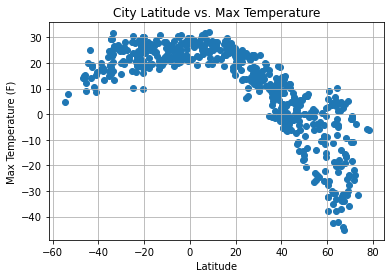

In [61]:
 # Build a scatter plot for each data type
plt.scatter(clean_city_df["Lat"], clean_city_df["temp"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig('MaxTempPerLat.png')

# Show plot
plt.show()

## Latitude vs. Humidity Plot

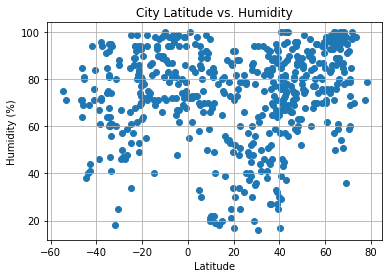

In [39]:
 # Build a scatter plot for each data type
plt.scatter(clean_city_df["Lat"], clean_city_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig('HumidityPerLat.png')

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

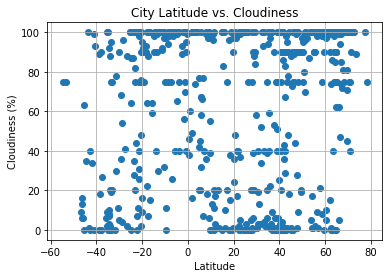

In [40]:
 # Build a scatter plot for each data type
plt.scatter(clean_city_df["Lat"], clean_city_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig('CloudinessPerLat.png')

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

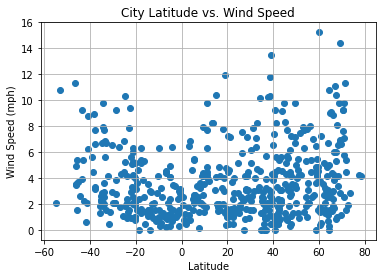

In [62]:
plt.scatter(clean_city_df["Lat"], clean_city_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig('WindSpeedPerLat.png')

# Show plot
plt.show()

## Linear Regression

In [42]:
southern_df = weather_data.drop(weather_data[weather_data['Lat'] >= 0].index, inplace = False)
southern_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,temp,Wind Speed
1,mar del plata,0,AR,1639988679,96,-38.0023,-57.5575,17.71,3.13
6,kaitangata,6,NZ,1639988684,71,-46.2817,169.8464,14.96,4.90
7,puerto ayora,95,EC,1639988684,94,-0.7393,-90.3518,20.68,2.85
8,punta arenas,75,CL,1639988685,71,-53.1500,-70.9167,8.06,10.80
11,arraial do cabo,75,BR,1639988687,94,-22.9661,-42.0278,19.98,1.54
...,...,...,...,...,...,...,...,...,...
537,carauari,99,BR,1639989122,99,-4.8828,-66.8958,23.07,1.01
541,valente,100,BR,1639989125,89,-11.4122,-39.4619,21.87,1.54
545,dunedin,6,NZ,1639989042,69,-45.8742,170.5036,15.40,5.40
546,kokstad,11,ZA,1639989129,25,-30.5472,29.4241,24.59,2.95


In [43]:
southern_df.describe()

,Cloudiness,Date,Humidity,Lat,Lng,temp,Wind Speed
count,181.000000,1.810000e+02,181.000000,181.000000,181.000000,181.000000,181.000000
mean,62.005525,1.639989e+09,75.325967,-21.539435,22.787410,22.789337,3.286077
std,38.546004,1.466570e+02,18.014465,13.145110,95.724936,5.419672,2.399249
min,0.000000,1.639988e+09,11.000000,-54.800000,-175.200000,4.810000,0.000000
25%,20.000000,1.639989e+09,67.000000,-33.039300,-57.557500,19.250000,1.540000
50%,75.000000,1.639989e+09,78.000000,-21.009600,18.116700,23.270000,2.570000
75%,99.000000,1.639989e+09,90.000000,-10.438900,122.876600,26.980000,4.500000
max,100.000000,1.639989e+09,100.000000,-0.600000,174.083300,36.910000,11.320000


In [44]:
northern_df = weather_data.drop(weather_data[weather_data['Lat'] < 0].index, inplace = False)
northern_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,temp,Wind Speed
0,victoria,100,HK,1639988494,88,22.2855,114.1577,17.40,0.45
2,upernavik,100,GL,1639988680,70,72.7868,-56.1549,-3.88,1.95
3,liyang,58,CN,1639988681,36,29.7057,118.2862,16.17,1.54
4,nikolskoye,100,RU,1639988682,85,59.7035,30.7861,-9.06,4.57
5,hilo,90,US,1639988683,49,19.7297,-155.0900,22.93,1.54
...,...,...,...,...,...,...,...,...,...
544,barcelos,100,PT,1639989127,70,41.5388,-8.6151,14.82,3.30
547,canatlan,0,MX,1639989130,82,24.5167,-104.7833,6.29,1.52
548,southbridge,0,US,1639989131,76,42.0751,-72.0334,-6.19,0.89
549,la rioja,83,ES,1639988925,57,42.2500,-2.5000,-3.12,2.41


In [45]:
northern_df.describe()

,Cloudiness,Date,Humidity,Lat,Lng,temp,Wind Speed
count,371.000000,3.710000e+02,371.000000,371.000000,371.000000,371.000000,371.000000
mean,57.609164,1.639989e+09,71.690027,39.569953,9.038123,4.707332,3.681968
std,40.905505,1.417847e+02,22.231664,20.010644,87.778020,17.763900,2.778899
min,0.000000,1.639988e+09,6.000000,0.533300,-179.166700,-45.240000,0.000000
25%,9.000000,1.639989e+09,59.000000,24.498850,-72.079500,-4.130000,1.540000
50%,75.000000,1.639989e+09,76.000000,40.802100,15.092500,6.550000,2.980000
75%,99.000000,1.639989e+09,89.000000,56.467850,80.540850,19.725000,4.860000
max,100.000000,1.639989e+09,100.000000,78.218600,179.316700,32.050000,15.240000


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

0       56.078103
2      106.579403
3       63.498303
4       93.496103
5       53.522303
          ...    
544     75.331403
547     58.309303
548     75.867703
549     76.042603
550     93.294803
Name: Lat, Length: 371, dtype: float64
y = -0.75x +34.55


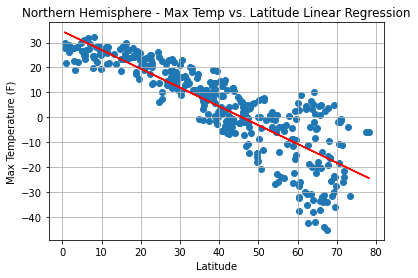

The r-value is -0.849467453067005.


In [63]:
 # Build a scatter plot for each data type
plt.scatter(northern_df["Lat"], northern_df["temp"], marker="o")

# Incorporate the other graph properties
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#perform a linear regression model 
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(northern_df["Lat"], northern_df["temp"])

#LinReg and plot line 
test1_df = northern_df["Lat"]
test2_df = northern_df["temp"]

model = st.linregress(test1_df,test2_df)
y_values = test1_df*model[0]+model[1]
plt.plot(test1_df, y_values, color ='r')

#get regression values
regress_values = northern_df["Lat"] + slope + intercept
print(regress_values)

line_eq = "y = " + str(round(slope, 2)) + "x +" + str(round(intercept, 2))
print(line_eq)

# Save the figure
plt.savefig('NorthernMaxTempPerLat.png')

#show figure
plt.show()

#Determine R Value 
print(f"The r-value is {rvalue}.")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

1     -10.488726
6     -18.768126
7      26.774274
8     -25.636426
11      4.547474
         ...    
537    22.630774
541    16.101374
545   -18.360626
546    -3.033626
551    26.108574
Name: Lat, Length: 181, dtype: float64
y = 0.21x +27.3


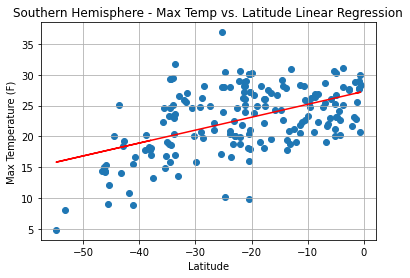

The r-value is 0.5083699612742746.


In [64]:
# Build a scatter plot for each data type
plt.scatter(southern_df["Lat"], southern_df["temp"], marker="o")

# Incorporate the other graph properties
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#perform a linear regression model 
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(southern_df["Lat"], southern_df["temp"])

#LinReg and plot line 
test3_df = southern_df["Lat"]
test4_df = southern_df["temp"]

model = st.linregress(test3_df,test4_df)
y_values = test3_df*model[0]+model[1]
plt.plot(test3_df, y_values, color ='r')

#get regression values
regress_values = southern_df["Lat"] + slope + intercept
print(regress_values)

line_eq = "y = " + str(round(slope, 2)) + "x +" + str(round(intercept, 2))
print(line_eq)

# Save the figure
plt.savefig('SouthernMaxTempPerLat.png')

# Show plot
plt.show()

#Determine R Value 
print(f"The r-value is {rvalue}.")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

0       78.753152
2      129.254452
3       86.173352
4      116.171152
5       76.197352
          ...    
544     98.006452
547     80.984352
548     98.542752
549     98.717652
550    115.969852
Name: Lat, Length: 371, dtype: float64
y = 0.39x +56.07
The r-value is 0.3552404241016318.


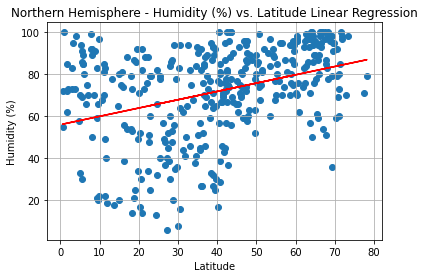

In [52]:
 # Build a scatter plot for each data type
plt.scatter(northern_df["Lat"], northern_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#perform a linear regression model 
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(northern_df["Lat"], northern_df["Humidity"])

#LinReg and plot line 
test5_df = northern_df["Lat"]
test6_df = northern_df["Humidity"]

model = st.linregress(test5_df,test6_df)
y_values = test5_df*model[0]+model[1]
plt.plot(test1_df, y_values, color ='r')

#get regression values
regress_values = northern_df["Lat"] + slope + intercept
print(regress_values)

line_eq = "y = " + str(round(slope, 2)) + "x +" + str(round(intercept, 2))
print(line_eq)

#Determine R Value 
print(f"The r-value is {rvalue}.")

# Save the figure
plt.savefig('NorthernHumidityPerLat.png')

# Show plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

1      47.449064
6      39.169664
7      84.712064
8      32.301364
11     62.485264
         ...    
537    80.568564
541    74.039164
545    39.577164
546    54.904164
551    84.046364
Name: Lat, Length: 181, dtype: float64
y = 0.45x +85.0


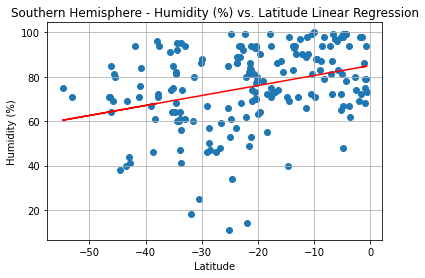

The r-value is 0.3278022367398254.


In [53]:
 # Build a scatter plot for each data type
plt.scatter(southern_df["Lat"], southern_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#perform a linear regression model 
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(southern_df["Lat"], southern_df["Humidity"])

#LinReg and plot line 
test7_df = southern_df["Lat"]
test8_df = southern_df["Humidity"]

model = st.linregress(test7_df,test8_df)
y_values = test7_df*model[0]+model[1]
plt.plot(test7_df, y_values, color ='r')

#get regression values
regress_values = southern_df["Lat"] + slope + intercept
print(regress_values)

line_eq = "y = " + str(round(slope, 2)) + "x +" + str(round(intercept, 2))
print(line_eq)

# Save the figure
plt.savefig('SouthernHumidityPerLat.png')

# Show plot
plt.show()

#Determine R Value 
print(f"The r-value is {rvalue}.")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

0       58.511802
2      109.013102
3       65.932002
4       95.929802
5       55.956002
          ...    
544     77.765102
547     60.743002
548     78.301402
549     78.476302
550     95.728502
Name: Lat, Length: 371, dtype: float64
y = 0.55x +35.67
The r-value is 0.27120396162392313.


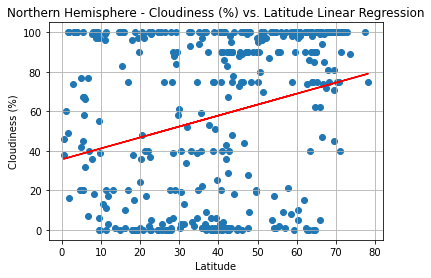

In [54]:
 # Build a scatter plot for each data type
plt.scatter(northern_df["Lat"], northern_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#LinReg and plot line 
test9_df = northern_df["Lat"]
test10_df = northern_df["Cloudiness"]

model = st.linregress(test9_df,test10_df)
y_values = test9_df*model[0]+model[1]
plt.plot(test9_df, y_values, color ='r')

#perform a linear regression model 
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(northern_df["Lat"], northern_df["Cloudiness"])

#get regression values
regress_values = northern_df["Lat"] + slope + intercept
print(regress_values)

line_eq = "y = " + str(round(slope, 2)) + "x +" + str(round(intercept, 2))
print(line_eq)

#Determine R Value 
print(f"The r-value is {rvalue}.")

# Save the figure
plt.savefig('NorthernCloudinessPerLat.png')

# Show plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

1      56.69943
6      48.42003
7      93.96243
8      41.55173
11     71.73563
         ...   
537    89.81893
541    83.28953
545    48.82753
546    64.15453
551    93.29673
Name: Lat, Length: 181, dtype: float64
y = 1.45x +93.25
The r-value is 0.4946969129936831.


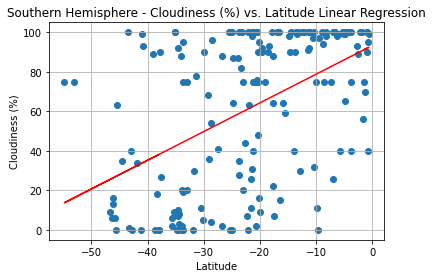

In [55]:
# Build a scatter plot for each data type
plt.scatter(southern_df["Lat"], southern_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)



#LinReg and plot line 
test11_df = southern_df["Lat"]
test12_df = southern_df["Cloudiness"]

model = st.linregress(test11_df,test12_df)
y_values = test11_df*model[0]+model[1]
plt.plot(test11_df, y_values, color ='r')

#perform a linear regression model 
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(southern_df["Lat"], southern_df["Cloudiness"])

#get regression values
regress_values = southern_df["Lat"] + slope + intercept
print(regress_values)

line_eq = "y = " + str(round(slope, 2)) + "x +" + str(round(intercept, 2))
print(line_eq)

#Determine R Value 
print(f"The r-value is {rvalue}.")

# Save the figure
plt.savefig('SouthernCloudinessPerLat.png')

# Show plot
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

0      24.991283
2      75.492583
3      32.411483
4      62.409283
5      22.435483
         ...    
544    44.244583
547    27.222483
548    44.780883
549    44.955783
550    62.207983
Name: Lat, Length: 371, dtype: float64
y = 0.03x +2.68


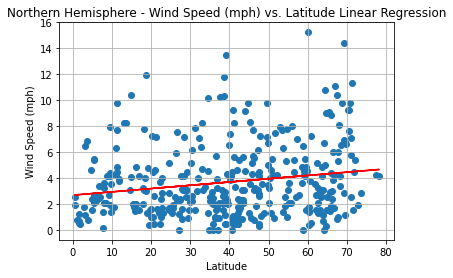

The r-value is 0.18225154471082688.


In [65]:
#Build a scatter plot for each data type
plt.scatter(northern_df["Lat"], northern_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)


#LinReg and plot line 
test13_df = northern_df["Lat"]
test14_df = northern_df["Wind Speed"]

model = st.linregress(test13_df,test14_df)
y_values = test13_df*model[0]+model[1]
plt.plot(test13_df, y_values, color ='r')

#perform a linear regression model 
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(northern_df["Lat"], northern_df["Wind Speed"])

#get regression values
regress_values = northern_df["Lat"] + slope + intercept
print(regress_values)

line_eq = "y = " + str(round(slope, 2)) + "x +" + str(round(intercept, 2))
print(line_eq)

# Save the figure
plt.savefig('NothernWindSpeedPerLat.png')

# Show plot
plt.show()

#Determine R Value 
print(f"The r-value is {rvalue}.")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

1     -36.387745
6     -44.667145
7       0.875255
8     -51.535445
11    -21.351545
         ...    
537    -3.268245
541    -9.797645
545   -44.259645
546   -28.932645
551     0.209555
Name: Lat, Length: 181, dtype: float64
y = -0.07x +1.69
The r-value is -0.406310578010524.


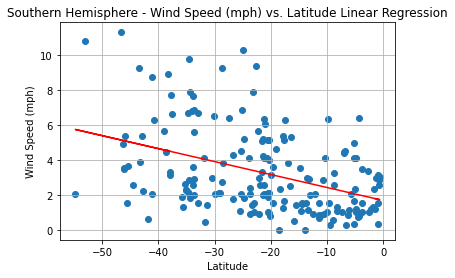

In [66]:
# Build a scatter plot for each data type
plt.scatter(southern_df["Lat"], southern_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)


#LinReg and plot line 
test15_df = southern_df["Lat"]
test16_df = southern_df["Wind Speed"]

model = st.linregress(test15_df,test16_df)
y_values = test15_df*model[0]+model[1]
plt.plot(test15_df, y_values, color ='r')

#perform a linear regression model 
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(southern_df["Lat"], southern_df["Wind Speed"])

#get regression values
regress_values = southern_df["Lat"] + slope + intercept
print(regress_values)

line_eq = "y = " + str(round(slope, 2)) + "x +" + str(round(intercept, 2))
print(line_eq)

#Determine R Value 
print(f"The r-value is {rvalue}.")

# Save the figure
plt.savefig('SouthernWindSpeedPerLat.png')

# Show plot
plt.show()

# observations 

MAX TEMP & LATITUDE
Max temp and latitude in the southern hemisphere have a strong positive relationship (r-value = 0.50).

Max temp and latitude in the northern hemisphere have strong negative relationship (r-value = -0.84). 

---

HUMIDITY & LATITUDE
Humidity and latitude in the southern hemisphere have no relationship (r-value = 0.32).

Humidity and latitude in the northern hemisphere have no relationship (r-value = 0.35).

---

CLOUDINESS & LATITUTE
Cloudiness and latitude in the southern hemisphere have a strong positive relationship (r-value = 0.49).

Cloudiness and latitude in the northern hemisphere have no relationship (r-value = 0.27).

---

WIND SPEED & LATITUDE
Wind speed and latitude in the southern hemisphere have a small negative relationship (r-value = -0.40).

Wind speed and latitdue in the northern hemisphere have a nill positive relationship (r-value = 0.18).    

---

1.Initial thoughts are around the data, that in my observation, could be skewed noting I've analysed 181 southern cities and 371 northern cities. The disparity is high. 

2.The results show no particular correlation between wind speed and hemispheres 

3.Results reveal a strong correlation between latitude and max temperature. The closer to the equator, the higher the temperature. 


